In [29]:
#First import relevant packages
%matplotlib inline  

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
 
#set plot options to get nicer figures
plt.rcParams['figure.figsize'] = [12, 4]
plt.rcParams['figure.dpi'] = 100

We create a simple resource competition model, where growth is modeled as:

$dn_i/dt = n_i \cdot (\sum_j x_{ij} * r_j - d)$

$dr_j/dt = r - r_j \cdot \sum_i x_{ij} * n_i + \sum_i p_{ij} * n_i$

where $i$ indicates species, $j$ resource, $x_{ij}$ specifies rate at which species $i$ uses resource $j$ and $p_{ij}$ specifies rate at which species $i$ produces resource $j$.

In this notebook we assume:

- species 1 only uses resource 1, with rate 1, and produces resource 2, with rate 1/d
- species 2 uses resource 1 with rate 1 and resource 2 with rate $x_{bd}$
- species 3 uses resource 1 with rate 1 and resource 2 with rate $x_{cd}$

i.e. the species compete for resource 1, in addition species 1 produces a growth enhancer for which species 2 and 3 compete

In mono-culture all species reach density 1/d = 100

In [21]:
#define ODE function, needed by solve_ivp
def ode_fun(t, x, x_bb, x_cb):
    
    x_aa = 1
    x_ba = 1
    x_ca = 1
    
    r = 1
    d = 1E-2
    
    p_ab = 1E-2
    
    na = x[0]
    nb = x[1]
    nc = x[2]
    ra = x[3]
    rb = x[4]
        
    ddt_na = na * (x_aa * ra - d)
    ddt_nb = nb * (x_ba * ra + x_bb * rb - d)
    ddt_nc = nc * (x_ca * ra + x_cb * rb - d)
    
    ddt_ra = r - (na * x_aa + nb * x_ba + nc * x_ca) * ra
   
    ddt_rb = na * p_ab - (nb * x_bb + nc * x_cb) * rb

    return np.array([ddt_na, ddt_nb, ddt_nc, ddt_ra, ddt_rb])
    
    
def run_model(x_0, x_bb, x_cb):
    t_span = (0, 10000)
    t_eval = np.arange(0, 10000, 50)  

    x_out = solve_ivp(ode_fun, t_span, x_0, method='RK45', t_eval=t_eval, args=(x_bb, x_cb))
    fig, axs = plt.subplots(1,2)

    axs[0].plot(x_out.t,x_out.y[:3,:].T)
    axs[0].legend(['na','nb','nc'])

    axs[1].plot(x_out.t,x_out.y[3:,:].T)
    axs[1].legend(['ra','rb'])
    
    return x_out.y[:3,-1]

## No growth enhancer

array([33.33332378, 33.33332378, 33.33332378])

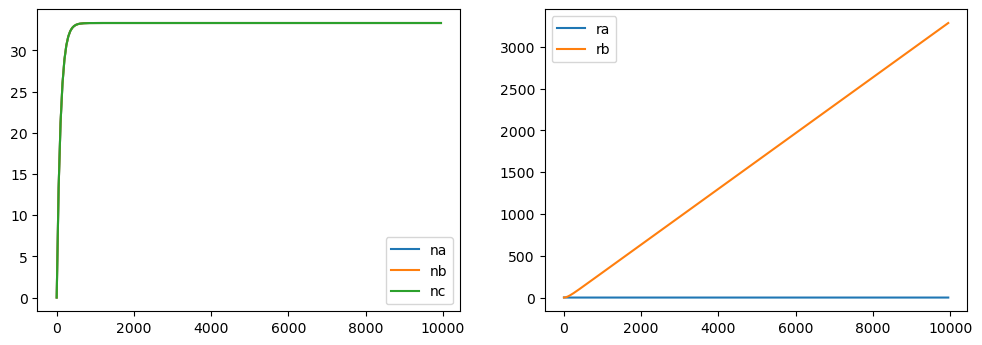

In [22]:
run_model(np.array([1E-3,1E-3,1E-3,1,0]), 0, 0)

## Co-culture symmetric competition

array([ 0.9856102 , 50.00495737, 50.00495737])

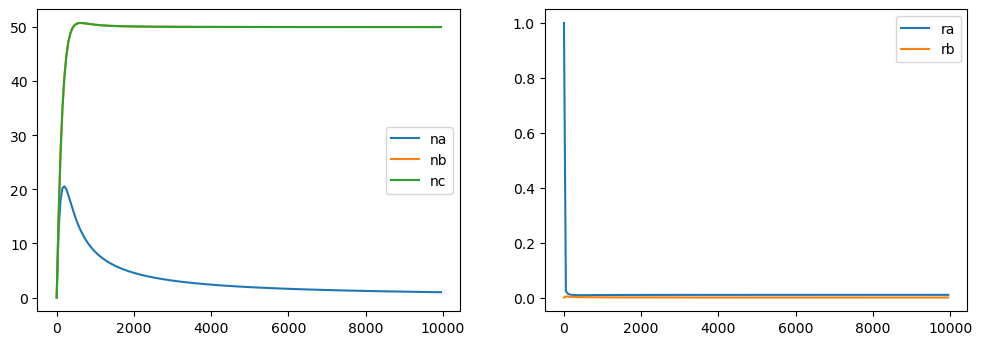

In [23]:
run_model(np.array([1E-3,1E-3,1E-3,1,0]), 1, 1)

## Co-culture asymmetric competition

array([ 0.98564014, 98.44796365,  1.56195033])

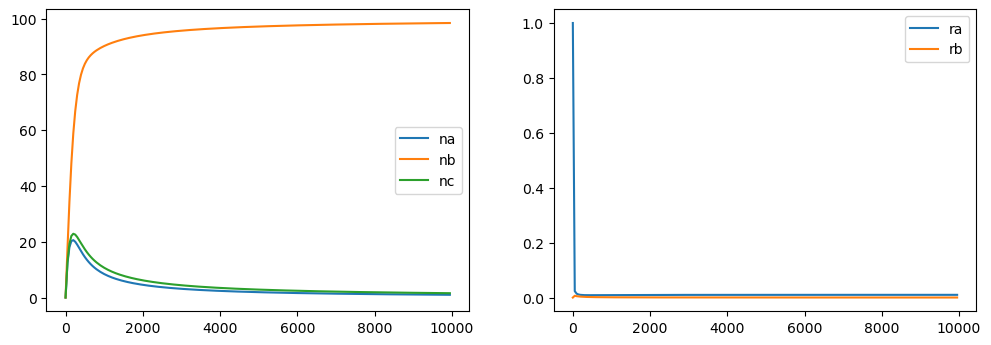

In [25]:
run_model(np.array([1E-3,1E-3,1E-3,1,0]), 1, 0.1)

## Pair-wise cultures asymmetric competition

array([  0.99544506, 100.0101098 ,   0.        ])

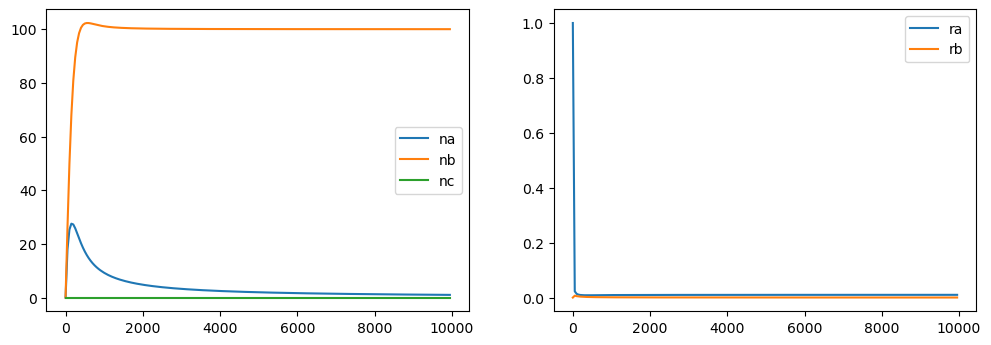

In [26]:
run_model(np.array([1E-3,1E-3,0,1,0]), 1, 0.1)

array([  0.99565958,   0.        , 100.01012789])

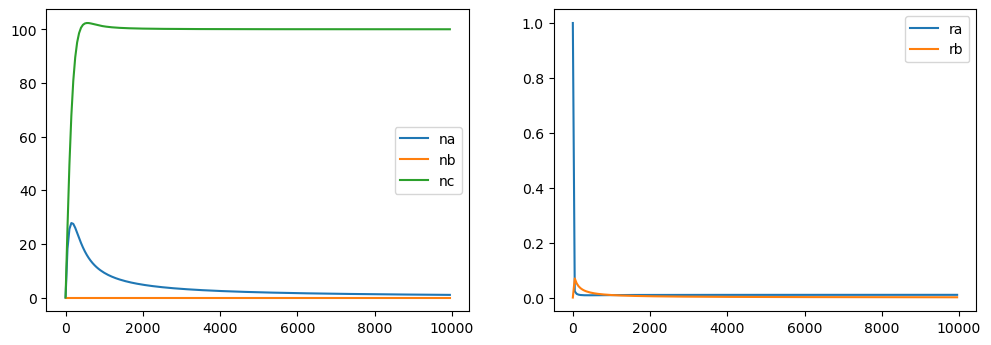

In [27]:
run_model(np.array([1E-3,0,1E-3,1,0]), 1, 0.1)

array([ 0.        , 50.00000104, 50.00000104])

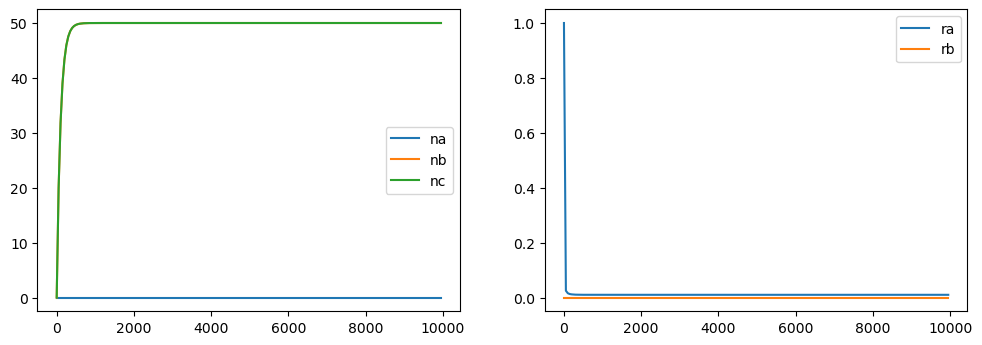

In [28]:
run_model(np.array([0,1E-3,1E-3,1,0]), 1, 0.1)